# Pandas Template

### 1. Import libraries and set display options and formatting

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl

# set display options
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# set matplotlib display options
%matplotlib inline

# set numeric format
pd.options.display.float_format = '{:,.2f}'.format

### 2. Read file1

In [5]:
# read file1.csv
file1 = pd.read_csv('file1.csv', index_col='YearMonth')
print('file1')
print('='*74)
print('Data Types:')
print('-'*74) 
print(file1.dtypes)
print('-'*74) 
print('Missing Value Count:')
print('-'*74)
print(file1.isnull().sum())
print('-'*74)
print('Raw Data:')
print('-'*74)
print(file1.head())
print(file1.tail())
print('-'*74)
print('Descriptive statistics:')
print('-'*74)
print(file1.describe())
print('='*74)

file1
Data Types:
--------------------------------------------------------------------------
Quantity    int64
dtype: object
--------------------------------------------------------------------------
Missing Value Count:
--------------------------------------------------------------------------
Quantity    0
dtype: int64
--------------------------------------------------------------------------
Raw Data:
--------------------------------------------------------------------------
            Quantity
YearMonth           
2010-01-01         0
2010-02-01         0
2010-03-01         0
2010-04-01  13756677
2010-05-01  14818991
            Quantity
YearMonth           
2016-08-01  18431915
2016-09-01  15010081
2016-10-01  10947364
2016-11-01   5951244
2016-12-01   3467710
--------------------------------------------------------------------------
Descriptive statistics:
--------------------------------------------------------------------------
           Quantity
count         84.00
mean   9,

### 3. Read file2

In [6]:
# read file2.csv
file2 = pd.read_csv('file2.csv', index_col='YearMonth')
print('file2')
print('='*74)
print('Data Types:')
print('-'*74) 
print(file2.dtypes)
print('-'*74) 
print('Missing Value Count:')
print('-'*74)
print(file2.isnull().sum())
print('-'*74)
print('Raw Data:')
print('-'*74)
print(file2.head())
print(file2.tail())
print('-'*74)
print('Descriptive statistics:')
print('-'*74)
print(file2.describe())
print('='*74)

file2
Data Types:
--------------------------------------------------------------------------
Quantity    int64
dtype: object
--------------------------------------------------------------------------
Missing Value Count:
--------------------------------------------------------------------------
Quantity    0
dtype: int64
--------------------------------------------------------------------------
Raw Data:
--------------------------------------------------------------------------
            Quantity
YearMonth           
2010-01-01   7745405
2010-02-01         0
2010-03-01   9391924
2010-04-01  13916664
2010-05-01  13244921
            Quantity
YearMonth           
2016-08-01  14931450
2016-09-01  18111471
2016-10-01  31110002
2016-11-01  23994265
2016-12-01  29436874
--------------------------------------------------------------------------
Descriptive statistics:
--------------------------------------------------------------------------
           Quantity
count         84.00
mean  11,

### 4. file2 transformations

In [7]:
# file2 - create 1 month lead of quantity
file2_sft1 = file2.shift(1)
print('='*74)
print(file2.head()) 
print(file2.tail())
print('-'*74)
print(file2_sft1.head())
print(file2_sft1.tail())
print('-'*74)
print(file2.describe())
print(file2_sft1.describe())
print('='*74)

# file2 - create 2 month lead of quantity
file2_sft2 = file2.shift(2)
print('='*74)
print(file2_sft2.head())
print(file2_sft2.tail())
print('-'*74)
print(file2_sft2.describe())
print('='*74)

            Quantity
YearMonth           
2010-01-01   7745405
2010-02-01         0
2010-03-01   9391924
2010-04-01  13916664
2010-05-01  13244921
            Quantity
YearMonth           
2016-08-01  14931450
2016-09-01  18111471
2016-10-01  31110002
2016-11-01  23994265
2016-12-01  29436874
--------------------------------------------------------------------------
                Quantity
YearMonth               
2010-01-01           nan
2010-02-01  7,745,405.00
2010-03-01          0.00
2010-04-01  9,391,924.00
2010-05-01 13,916,664.00
                Quantity
YearMonth               
2016-08-01  5,479,522.00
2016-09-01 14,931,450.00
2016-10-01 18,111,471.00
2016-11-01 31,110,002.00
2016-12-01 23,994,265.00
--------------------------------------------------------------------------
           Quantity
count         84.00
mean  11,104,706.42
std    7,828,998.79
min            0.00
25%    5,370,939.25
50%    9,788,542.50
75%   16,066,699.25
max   31,110,002.00
           Quantity
count 

### 5. merge file1 and file2 + transformations

In [11]:
# merge file1 and file2
df_file1_2 = pd.concat([file1, file2, file2_sft1, file2_sft2], axis=1)
df_file1_2.columns = ['f1_t0', 'f2_t0', 'f2_t1', 'f2_t2']
df_file1_2['f2_2m_avg'] = (df_file1_2['f2_t0'] + df_file1_2['f2_t1']) / 2
df_file1_2['f2_3m_avg'] = (df_file1_2['f2_t0'] + df_file1_2['f2_t1'] + df_file1_2['f2_t2']) / 3
print('='*72)
print('original units')
print('-'*72)
print(df_file1_2.head())
print(df_file1_2.tail())
print('-'*72)
print(df_file1_2.describe())
print('='*72)

# convert quantity units
df_file1_2['f1_t0_new_units'] = round(df_file1_2['f1_t0'] / 1000)
df_file1_2['f2_2m_avg_new_units'] = round(df_file1_2['f2_2m_avg'] / 1000)
print('='*72)
print('new units')
print('-'*72)
print(df_file1_2.head())
print(df_file1_2.tail())
print('='*72)
print(df_file1_2.describe())
print('='*72)

original units
------------------------------------------------------------------------
               f1_t0     f2_t0         f2_t1        f2_t2     f2_2m_avg  \
YearMonth                                                                 
2010-01-01         0   7745405           nan          nan           nan   
2010-02-01         0         0  7,745,405.00          nan  3,872,702.50   
2010-03-01         0   9391924          0.00 7,745,405.00  4,695,962.00   
2010-04-01  13756677  13916664  9,391,924.00         0.00 11,654,294.00   
2010-05-01  14818991  13244921 13,916,664.00 9,391,924.00 13,580,792.50   

               f2_3m_avg  
YearMonth                 
2010-01-01           nan  
2010-02-01           nan  
2010-03-01  5,712,443.00  
2010-04-01  7,769,529.33  
2010-05-01 12,184,503.00  
               f1_t0     f2_t0         f2_t1         f2_t2     f2_2m_avg  \
YearMonth                                                                  
2016-08-01  18431915  14931450  5,479,522.00 

### 6. Matplotlib Template

**Line Plot**

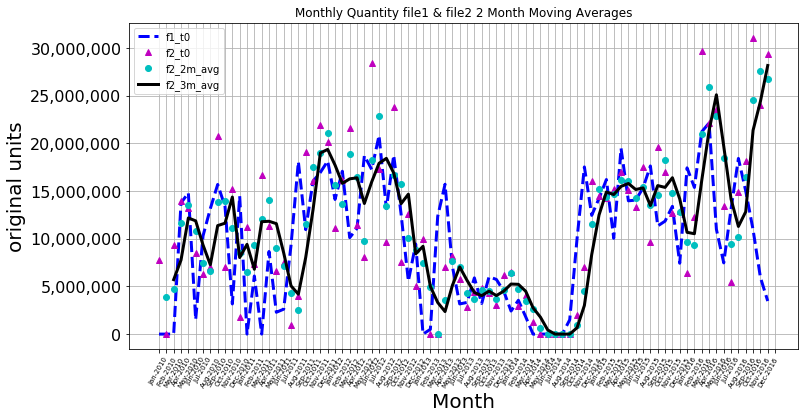

In [16]:
# line plot

plt_dat = df_file1_2[['f1_t0', 'f2_t0', 'f2_2m_avg', 'f2_3m_avg']]

plt_df1_2 = plt_dat.plot(title = 'Monthly Quantity file1 & file2 2 Month Moving Averages',
                                 style=['b--', 'm^', 'co', 'k-'],
                                 figsize=(12,6),
                                 lw = 3,
                                 fontsize=16)

plt_df1_2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt_df1_2.set_ylabel('original units', fontsize=20)
plt_df1_2.set_xlabel('Month', fontsize=20)
plt_df1_2.set_xticks(np.arange(0,85,1))
plt_df1_2.set_xticklabels(['Jan-2010', 'Feb-2010', 'Mar-2010', 'Apr-2010', 'May-2010', 'Jun-2010', 'Jul-2010', 'Aug-2010', 'Sep-2010', 'Oct-2010', 'Nov-2010', 'Dec-2010',
                                'Jan-2011', 'Feb-2011', 'Mar-2011', 'Apr-2011', 'May-2011', 'Jun-2011', 'Jul-2011', 'Aug-2011', 'Sep-2011', 'Oct-2011', 'Nov-2011', 'Dec-2011',
                                'Jan-2012', 'Feb-2012', 'Mar-2012', 'Apr-2012', 'May-2012', 'Jun-2012', 'Jul-2012', 'Aug-2012', 'Sep-2012', 'Oct-2012', 'Nov-2012', 'Dec-2012',
                                'Jan-2013', 'Feb-2013', 'Mar-2013', 'Apr-2013', 'May-2013', 'Jun-2013', 'Jul-2013', 'Aug-2013', 'Sep-2013', 'Oct-2013', 'Nov-2013', 'Dec-2013',
                                'Jan-2014', 'Feb-2014', 'Mar-2014', 'Apr-2014', 'May-2014', 'Jun-2014', 'Jul-2014', 'Aug-2014', 'Sep-2014', 'Oct-2014', 'Nov-2014', 'Dec-2014',
                                'Jan-2015', 'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'Jun-2015', 'Jul-2015', 'Aug-2015', 'Sep-2015', 'Oct-2015', 'Nov-2015', 'Dec-2015',
                                'Jan-2016', 'Feb-2016', 'Mar-2016', 'Apr-2016', 'May-2016', 'Jun-2016', 'Jul-2016', 'Aug-2016', 'Sep-2016', 'Oct-2016', 'Nov-2016', 'Dec-2016'], 
                                rotation=60, fontsize='x-small')

plt_df1_2.grid(True);


**Line Plot - Formatted**

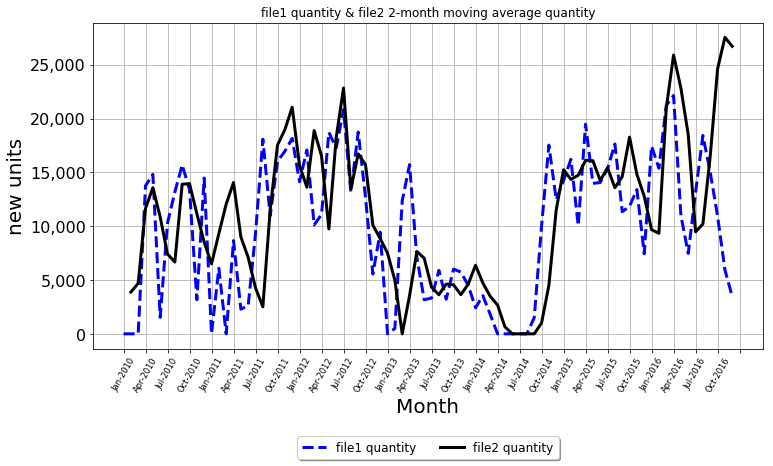

In [15]:
# formatted line plot

plt_dat = df_file1_2[['f1_t0_new_units', 'f2_2m_avg_new_units']]

plt_df1_2 = plt_dat.plot(title = 'file1 quantity & file2 2-month moving average quantity',
                                 style=['b--', 'k-'],
                                 figsize=(12,6),
                                 lw = 3,
                                 fontsize=16)

plt_df1_2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt_df1_2.set_ylabel('new units', fontsize=20)
plt_df1_2.set_xlabel('Month', fontsize=20)
plt_df1_2.set_xticks(np.arange(0,85,3))
plt_df1_2.set_xticklabels(['Jan-2010', 'Apr-2010', 'Jul-2010', 'Oct-2010', 
                                'Jan-2011', 'Apr-2011', 'Jul-2011', 'Oct-2011', 
                                'Jan-2012', 'Apr-2012', 'Jul-2012', 'Oct-2012', 
                                'Jan-2013', 'Apr-2013', 'Jul-2013', 'Oct-2013', 
                                'Jan-2014', 'Apr-2014', 'Jul-2014', 'Oct-2014', 
                                'Jan-2015', 'Apr-2015', 'Jul-2015', 'Oct-2015', 
                                'Jan-2016', 'Apr-2016', 'Jul-2016', 'Oct-2016'], 
                                rotation=60, fontsize='small')

plt_df1_2.grid(True)

plt_df1_2.legend(['file1 quantity','file2 quantity'],
                  loc="upper center", fontsize='large', bbox_to_anchor=(0.5, -0.25), fancybox=True, 
                  shadow=True, ncol=2);

**Scatter Plot**

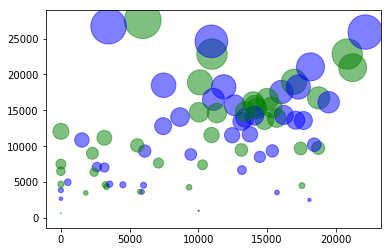

In [32]:
# scatter plot of file1 and file2 quantity
plt_dat = df_file1_2[['f1_t0_new_units', 'f2_2m_avg_new_units']]

x = df_file1_2['f1_t0_new_units']
y = df_file1_2['f2_2m_avg_new_units']
area = np.pi * (7.5 * y/10000)**2  # 0 to 7.5 point radii
plt.scatter(x, y, s=area, color=['Blue','Green'], label=['Exports', 'Imports'], alpha=0.5)
plt.show()


**Box Plot**

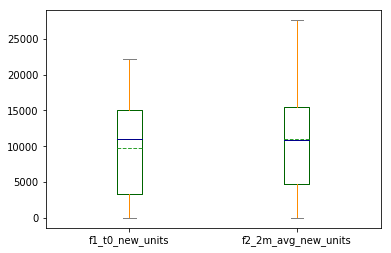

In [39]:
# box plots
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
plt_dat.plot.box(color=color, sym='r+', showmeans=True, meanline=True)